In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

import numpy as np

In [2]:
import numpy as np
import pandas as pd
import scipy.sparse as sp

from datetime import timedelta
from ast import literal_eval

import random

from sklearn.model_selection import train_test_split
from typing import Optional

In [17]:
import os
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython

output_folder_path = os.getcwd() + "/Federico/Recommenders/SLIM/result_experiments/"

# If directory does not exist, create
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

n_cases = 100  # using 10 as an example
n_random_starts = int(n_cases * 0.3)
metric_to_optimize = "MAP_MIN_DEN"
cutoff_to_optimize = 10
recommender_class = SLIM_BPR_Cython

In [18]:
output_folder_path

'/Users/federicobono/Documenti/Polimi/RecSys/repos/RecSysChallenge2023-Team/Daniele/RECOMMENDERS/SLIM/result_experiments/'

In [16]:
from Recommenders.DataIO import DataIO

data_loader = DataIO(folder_path = output_folder_path)
search_metadata = data_loader.load_data("massive_optimization_metadata.zip")

search_metadata.keys()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/federicobono/Documenti/Polimi/RecSys/repos/RecSysChallenge2023-Team/Daniele/SLIM/result_experiments/massive_optimization_metadata.zip'

In [83]:
hyperparameters_df = search_metadata["hyperparameters_df"]
hyperparameters_df

,topK,epochs,symmetric,sgd_mode,lambda_i,lambda_j,learning_rate
0,1032,900,True,sgd,0.00041,0.00007,0.059853
1,623,300,True,adagrad,0.00051,0.000601,0.022183
2,1202,100,True,adam,0.000001,0.000263,0.027893
3,963,100,True,adam,0.000181,0.005201,0.007176
4,706,300,True,sgd,0.000034,0.000011,0.005303
5,1312,300,True,sgd,0.000033,0.00237,0.032976
6,682,300,True,adagrad,0.000011,0.003649,0.026213
7,634,300,True,sgd,0.000803,0.003048,0.016484
8,1301,100,True,adam,0.000008,0.005581,0.037972
9,1426,300,True,sgd,0.000541,0.000011,0.014018


In [84]:
result_on_validation_df = search_metadata["result_on_validation_df"]
result_on_validation_df

,,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
,cutoff,,,,,,,,,,,,,,,,,,,,,
0,10,0.007978,0.079776,0.079776,0.003489,0.034894,0.034894,0.045374,0.014505,0.079776,0.034894,...,1.0,0.079776,1.0,0.022933,9.31053,0.996483,0.051805,0.690616,3.319772,0.224626
1,10,0.0075,0.074996,0.074996,0.003039,0.030393,0.030393,0.040788,0.013636,0.074996,0.030393,...,1.0,0.074996,1.0,0.008003,6.866991,0.975099,0.018079,0.509364,6.906431,0.197377
2,10,0.006313,0.063129,0.063129,0.002536,0.025357,0.025357,0.034172,0.011478,0.063129,0.025357,...,1.0,0.063129,1.0,0.00366,5.960618,0.964037,0.008267,0.442134,7.849421,0.18991
3,10,0.006258,0.062577,0.062577,0.0025,0.024996,0.024996,0.033746,0.011378,0.062577,0.024996,...,1.0,0.062577,1.0,0.004123,5.878988,0.961409,0.009314,0.436079,8.014023,0.189315
4,10,0.007219,0.072185,0.072185,0.002913,0.029128,0.029128,0.039171,0.013125,0.072185,0.029128,...,1.0,0.072185,1.0,0.00608,6.690983,0.973529,0.013734,0.496309,7.059155,0.195654
5,10,0.007922,0.079224,0.079224,0.003365,0.033649,0.033649,0.044323,0.014404,0.079224,0.033649,...,1.0,0.079224,1.0,0.009298,7.824547,0.987981,0.021005,0.580392,5.364251,0.206644
6,10,0.007492,0.074924,0.074924,0.00303,0.030302,0.030302,0.040707,0.013622,0.074924,0.030302,...,1.0,0.074924,1.0,0.008005,6.827179,0.974358,0.018083,0.506411,6.975032,0.196976
7,10,0.007797,0.077974,0.077974,0.003238,0.032382,0.032382,0.043039,0.014177,0.077974,0.032382,...,1.0,0.077974,1.0,0.009699,7.580866,0.984798,0.021909,0.562317,5.797074,0.204244
8,10,0.006315,0.063153,0.063153,0.002539,0.025394,0.025394,0.034207,0.011482,0.063153,0.025394,...,1.0,0.063153,1.0,0.003494,5.956078,0.964241,0.007894,0.441797,7.839144,0.189862


In [85]:
result = pd.merge(
    left=hyperparameters_df.reset_index(),
    right=result_on_validation_df[['MAP_MIN_DEN']].reset_index(),
    left_index=True,
    right_index=True
)

result

,index,topK,epochs,symmetric,sgd_mode,lambda_i,lambda_j,learning_rate,level_0,cutoff,MAP_MIN_DEN
0,0,1032,900,True,sgd,0.00041,0.00007,0.059853,0,10,0.034894
1,1,623,300,True,adagrad,0.00051,0.000601,0.022183,1,10,0.030393
2,2,1202,100,True,adam,0.000001,0.000263,0.027893,2,10,0.025357
3,3,963,100,True,adam,0.000181,0.005201,0.007176,3,10,0.024996
4,4,706,300,True,sgd,0.000034,0.000011,0.005303,4,10,0.029128
5,5,1312,300,True,sgd,0.000033,0.00237,0.032976,5,10,0.033649
6,6,682,300,True,adagrad,0.000011,0.003649,0.026213,6,10,0.030302
7,7,634,300,True,sgd,0.000803,0.003048,0.016484,7,10,0.032382
8,8,1301,100,True,adam,0.000008,0.005581,0.037972,8,10,0.025394
9,9,1426,300,True,sgd,0.000541,0.000011,0.014018,9,10,0.031202


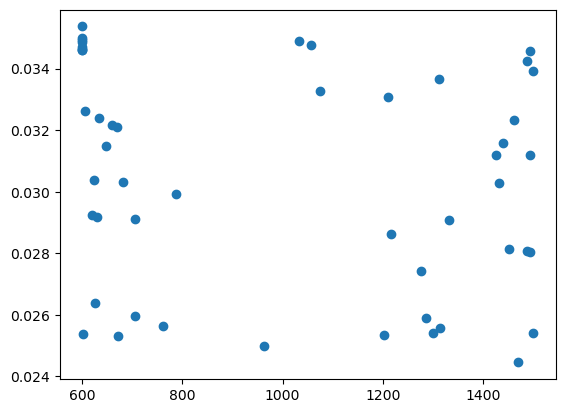

In [87]:
import matplotlib.pyplot as plt

plt.plot(result['topK'], result.MAP_MIN_DEN, 'o')

In [76]:
result_best_on_test = search_metadata["result_on_last"]
result_best_on_test

,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.007956,0.07956,0.07956,0.003325,0.033249,0.033249,0.044065,0.014465,0.07956,0.033249,...,1.0,0.07956,1.0,0.0159,8.577851,0.993078,0.035918,0.636269,4.347323,0.215231


In [77]:
best_hyperparameters = search_metadata["hyperparameters_best"]
best_hyperparameters

{'topK': 600,
 'epochs': 300,
 'symmetric': True,
 'sgd_mode': 'sgd',
 'lambda_i': 2.949963422566918e-05,
 'lambda_j': 1e-05,
 'learning_rate': 0.06211155651251035}